In [1]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
# Install MMCV
!pip install -U openmim
!mim install mmengine
!mim install "mmcv>=2.0.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.9/295.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.1/953.1 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 449.8/449.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 13.3 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 MB 5.6 MB/s eta 0:00:00


In [3]:
!rm -rf mmsegmentation
!git clone -b main https://github.com/open-mmlab/mmsegmentation.git
%cd mmsegmentation
!pip install -v -e .

Cloning into 'mmsegmentation'...
remote: Enumerating objects: 16269, done.
remote: Counting objects: 100% (635/635), done.
remote: Compressing objects: 100% (482/482), done.
remote: Total 16269 (delta 261), reused 373 (delta 137), pack-reused 15634
Receiving objects: 100% (16269/16269), 22.83 MiB | 24.73 MiB/s, done.
Resolving deltas: 100% (11274/11274), done.
/content/mmsegmentation
Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Obtaining file:///content/mmsegmentation
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-twksf39n/mmsegmentation.egg-info
  writing manifest file '/tmp/pip-pip-egg-info-twksf39n/mmsegmentation.egg-info/SOURCES.txt'
  writing manifest file '/tmp/pip-pip-egg-info-twksf39n/mmsegmentation.egg-info/SOURCES.txt'
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmsegmentation
    Running command python setup.py develop
    running develop
    /usr/local/lib/python3.

In [4]:
# Check Pytorch installation
import torch, torchvision
import matplotlib.pyplot as plt
print(torch.__version__, torch.cuda.is_available())

# Check MMSegmentation installation
import mmseg
print(mmseg.__version__)

2.0.1+cu118 True
1.2.0


In [5]:
#download checkpoints
!mkdir checkpoints
!wget https://download.openmmlab.com/mmsegmentation/v0.5/fastfcn/fastfcn_r50-d32_jpu_aspp_512x1024_80k_cityscapes/fastfcn_r50-d32_jpu_aspp_512x1024_80k_cityscapes_20210928_053722-5d1a2648.pth -P checkpoints/mmsegmentation/models/fastfcn_r50
#download config file
!mkdir configs/fastfcn_r50
!wget https://github.com/open-mmlab/mmsegmentation/blob/main/configs/fastfcn/fastfcn_r50-d32_jpu_aspp_4xb2-80k_cityscapes-512x1024.py -P config/fastfcn_r50


--2023-10-16 06:50:08--  https://download.openmmlab.com/mmsegmentation/v0.5/fastfcn/fastfcn_r50-d32_jpu_aspp_512x1024_80k_cityscapes/fastfcn_r50-d32_jpu_aspp_512x1024_80k_cityscapes_20210928_053722-5d1a2648.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 8.48.85.213, 8.48.85.212, 8.48.85.214, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|8.48.85.213|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 351867641 (336M) [application/octet-stream]
Saving to: ‘checkpoints/mmsegmentation/models/fastfcn_r50/fastfcn_r50-d32_jpu_aspp_512x1024_80k_cityscapes_20210928_053722-5d1a2648.pth’

fastfcn_r50-d32_jpu 100%[===================>] 335.57M  8.95MB/s    in 34s     

2023-10-16 06:50:43 (9.99 MB/s) - ‘checkpoints/mmsegmentation/models/fastfcn_r50/fastfcn_r50-d32_jpu_aspp_512x1024_80k_cityscapes_20210928_053722-5d1a2648.pth’ saved [351867641/351867641]

--2023-10-16 06:50:43--  https://github.com/open-mmlab/mmsegmentation/blob/main/confi

In [6]:
!pip install ftfy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.5 MB/s eta 0:00:00


In [7]:
from mmseg.apis import init_model, inference_model, mmseg_inferencer, show_result_pyplot

In [11]:
config_file = '/content/mmsegmentation/configs/fastfcn/fastfcn_r50-d32_jpu_aspp_4xb2-80k_cityscapes-512x1024.py'
checkpoint_file = '/content/mmsegmentation/checkpoints/mmsegmentation/models/fastfcn_r50/fastfcn_r50-d32_jpu_aspp_512x1024_80k_cityscapes_20210928_053722-5d1a2648.pth'

In [12]:
# build the model from a config file and a checkpoint file
model = init_model(config_file, checkpoint_file)

/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:249: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: /content/mmsegmentation/checkpoints/mmsegmentation/models/fastfcn_r50/fastfcn_r50-d32_jpu_aspp_512x1024_80k_cityscapes_20210928_053722-5d1a2648.pth


In [25]:
# test a single image
img = '/content/mmsegmentation/demo/frankfurt_000000_000294_leftImg8bit.png'
result = inference_model(model, img)

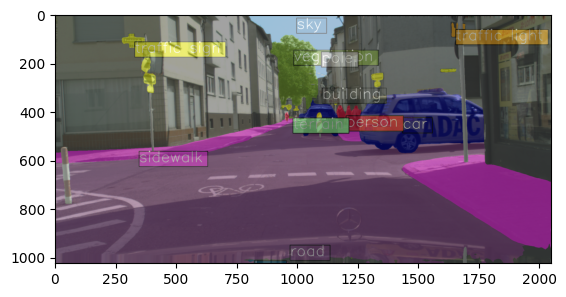

In [26]:
# display the segmentation result

vis_result = show_result_pyplot(model, img, result, show=False)
plt.imshow(vis_result)

In [27]:

# save the visualization result, the output image would be found at the path `work_dirs/result.png`
vis_image = show_result_pyplot(model, img, result, out_file='work_dirs/result.png')